# HW2 Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

import niceplots
plt.style.use(niceplots.get_style())
colors = niceplots.get_colors_list()

In [2]:
import pandas as pd

In [3]:
def redlich_kister_poly(x, coeffs):
    result = 0.0
    for i in range(0, len(coeffs)):
        result += (coeffs[i]) * ((1 - 2*x)**(i+1) - (2*x*i*(1-x))/(1-2*x)**(1-i))

    result += (8.3145 * 298.15 / 96485.3321) * np.log(x/(1-x))

    return result

def rk_excess(x, coeffs):
    result = 0.0
    for i in range(0, len(coeffs)):
        result += (coeffs[i] * x * (1-x) * (1-2*x)**i)

    return result

def loss_function(func, coeffs, x, h):
    predictions = func(x, coeffs)
    return np.sum((predictions - h) ** 2)
    

def legendre_poly_recurrence(x, n):
    P = [np.ones_like(x), x]  # P_0(x) = 1, P_1(x) = x
    for i in range(1, n):
        P_next = ((2 * i + 1) * x * P[i] - i * P[i - 1]) / (i + 1)
        P.append(P_next)
    return P

def leg_excess(x, coeffs):
    t = 1 - 2 * x
    Pn_values = legendre_poly_recurrence(t,len(coeffs))
    result = 0.0
    for i in range(0, len(coeffs)):
        result += (coeffs[i] * x * (1-x) * Pn_values[i])  # Higher-order terms

    return result


def legendre_derivative_poly_recurrence(x, n):
    """
    Compute the Legendre polynomials derivatives up to degree n 
    using (x^2-1)/n P'n(x) = xP_n(x) - P_(n-1)(x),
    and return all n functions in a list
    """
    Pn_values = legendre_poly_recurrence(x,n)
    Pn_derivatives = [0.0]
    for i in range(1, n+1):
        Pn_derivative_next = (x*Pn_values[i] - Pn_values[i-1])/((x**2-1)/i)
        Pn_derivatives.append(Pn_derivative_next)
    return Pn_derivatives


def legendre_poly(x, coeffs):
    t = 1 - 2 * x
    Pn_values = legendre_poly_recurrence(t, len(coeffs))
    Pn_der_values = legendre_derivative_poly_recurrence(t, len(coeffs))
    
    # Compute the polynomial expansion by summing over coefficients
    term_1 = -x * sum(coeffs[i] * Pn_values[i] for i in range(len(coeffs)))
    term_2 = (1-x) * sum(coeffs[i] * Pn_values[i] for i in range(len(coeffs)))
    term_3 = x * (1-x) * sum(coeffs[i] * Pn_der_values[i] for i in range(len(coeffs))) * -2
    result = (8.3145 * 298.15 / 96485.3321) * np.log(x/(1-x)) + term_1 + term_2 + term_3

    return result

In [4]:
df = pd.read_csv("./LiRuSn.txt", sep='\t', names=['x', 'OCV'])
RuSn_x = df["x"].to_numpy()
print(RuSn_x[-1])
RuSn_x = RuSn_x / RuSn_x[-1]
RuSn_ocv = df["OCV"].to_numpy()

3.97


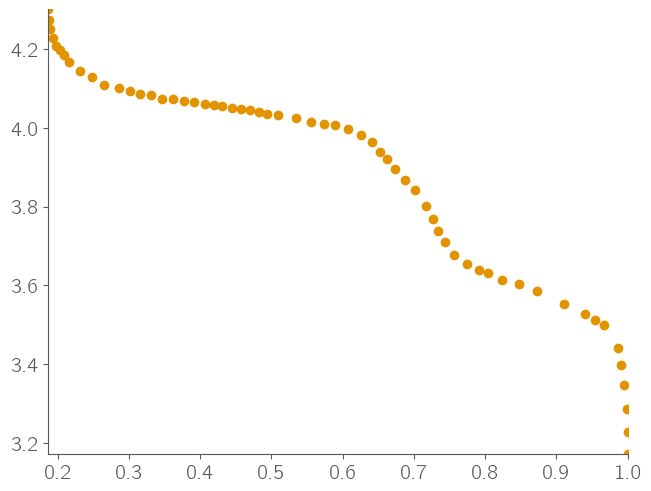

In [5]:
plt.scatter(RuSn_x, RuSn_ocv)

## 7th order fit

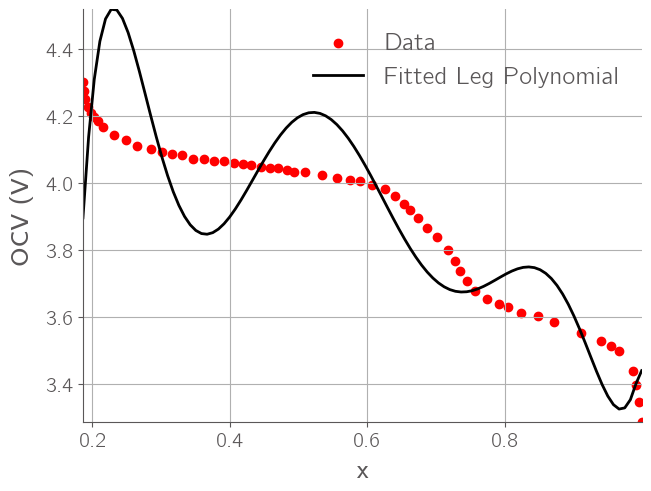

Optimized coefficients Legendre: [13.84211726 20.02796814 16.69309274 11.29853364  6.38005504  2.83502039
  0.88307359]


In [6]:
x_data = RuSn_x[:-2]
h_data = -RuSn_ocv[:-2]

N_max = 7
initial_guess_leg = np.ones(N_max) * 0.1

result_leg = minimize(lambda c: loss_function(legendre_poly, c, x_data, h_data), initial_guess_leg, method='BFGS')

# Extract the optimized coefficients
leg_optimized_coeffs = result_leg.x

# Generate a smooth curve for plotting
x_fit = np.linspace(min(x_data), max(x_data)-1e-5, 100)

h_fit_leg = legendre_poly(x_fit, leg_optimized_coeffs)

# Plot the data and the fit
plt.scatter(x_data, -h_data, label='Data', color='red')
plt.plot(x_fit, -h_fit_leg, label='Fitted Leg Polynomial', color='black')

plt.xlabel('x')
plt.ylabel('OCV (V)')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimized coefficients
print("Optimized coefficients Legendre:", leg_optimized_coeffs)

## 12th order fit

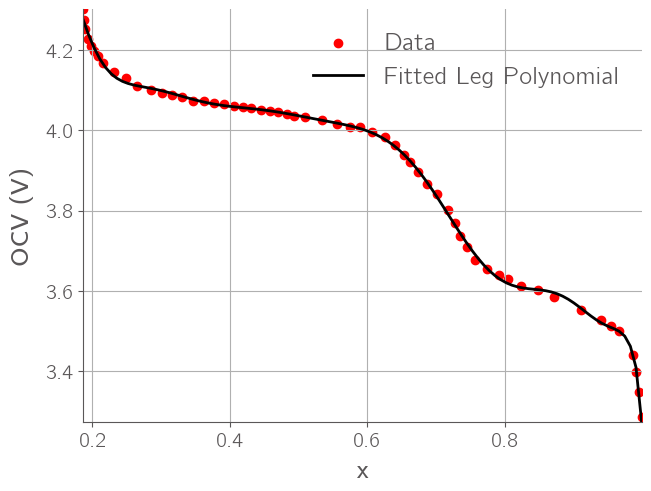

Optimized coefficients Legendre: [16.13460396 26.43247771 26.07164932 21.92076274 16.62074874 11.4865422
  7.17513741  4.10883279  2.07538985  0.90249836  0.3143592   0.09203164]


In [7]:
x_data = RuSn_x[:-2]
h_data = -RuSn_ocv[:-2]

N_max = 12
initial_guess_leg = np.ones(N_max) * 0.1

result_leg = minimize(lambda c: loss_function(legendre_poly, c, x_data, h_data), initial_guess_leg, method='BFGS')

# Extract the optimized coefficients
leg_optimized_coeffs = result_leg.x

# Generate a smooth curve for plotting
x_fit = np.linspace(min(x_data), max(x_data)-1e-5, 100)

h_fit_leg = legendre_poly(x_fit, leg_optimized_coeffs)

# Plot the data and the fit
plt.scatter(x_data, -h_data, label='Data', color='red')
plt.plot(x_fit, -h_fit_leg, label='Fitted Leg Polynomial', color='black')

plt.xlabel('x')
plt.ylabel('OCV (V)')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimized coefficients
print("Optimized coefficients Legendre:", leg_optimized_coeffs)